Nama : Lia Fitriyanti <br>
NIM : 211351072<br>
Kelas : IF Pagi B

# import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liafitriyanti","key":"d21d2e5a904311ae7fdd3b3a37b66734"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 5.64MB/s]


In [ ]:
!mkdir uas
!unzip pima-indians-diabetes-database.zip -d uas
!ls uas

Archive:  pima-indians-diabetes-database.zip
  inflating: uas/diabetes.csv        
diabetes.csv


# import library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fetal_health.csv')

# Data Discovery

In [3]:
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.value_counts('fetal_health')

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.rename(index=str, columns={'baseline value' : 'baseline_value'}, inplace=True)

# EDA (minimal 5)

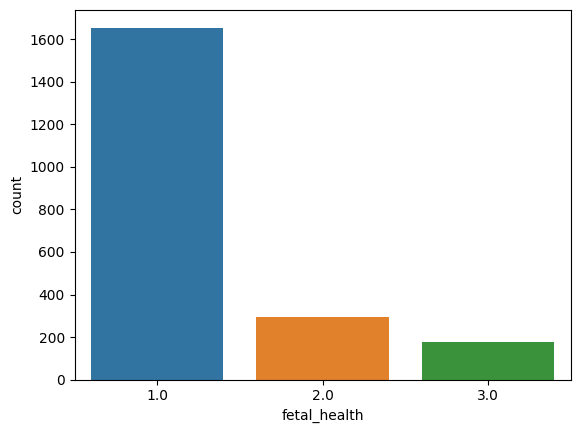

In [8]:
sns.countplot(x=df['fetal_health'], data=df)
plt.show()

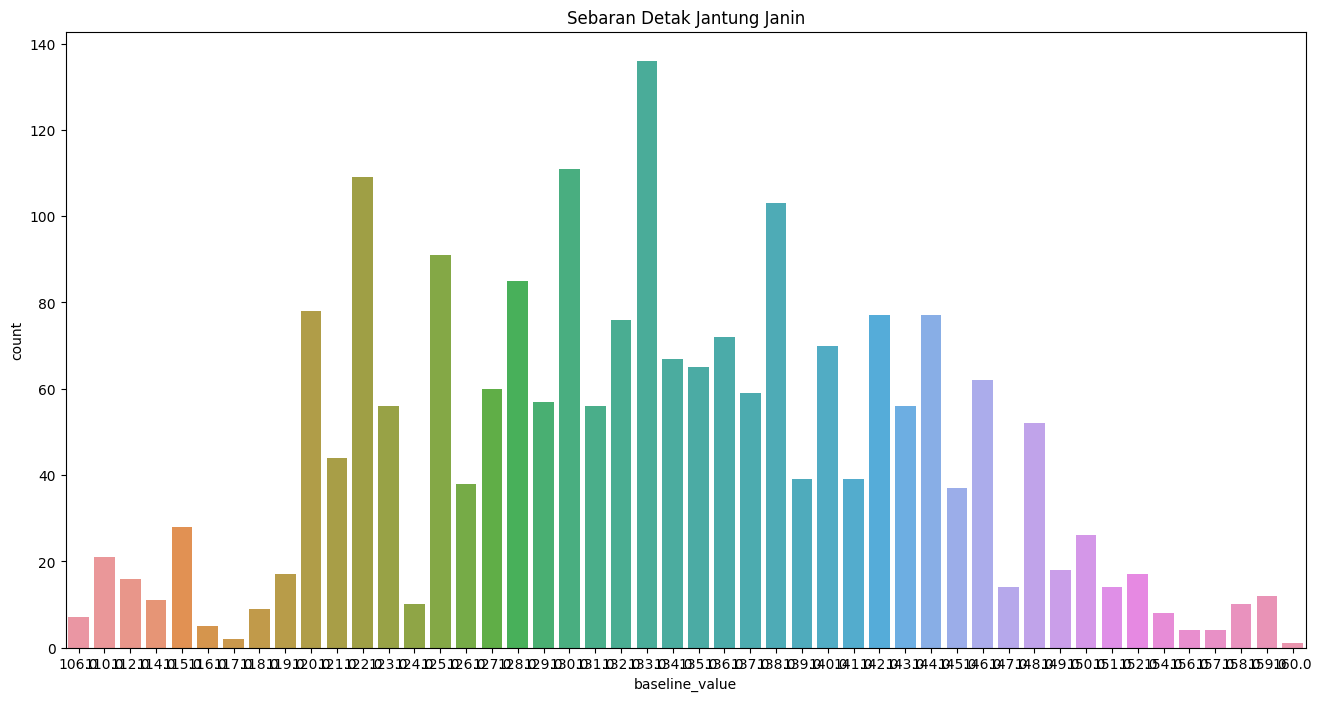

In [9]:
plt.figure(figsize=(16,8))
plt.title('Sebaran Detak Jantung Janin')
sns.countplot(x=df['baseline_value'],hue_order=df.baseline_value.value_counts().index[:10])
plt.show()

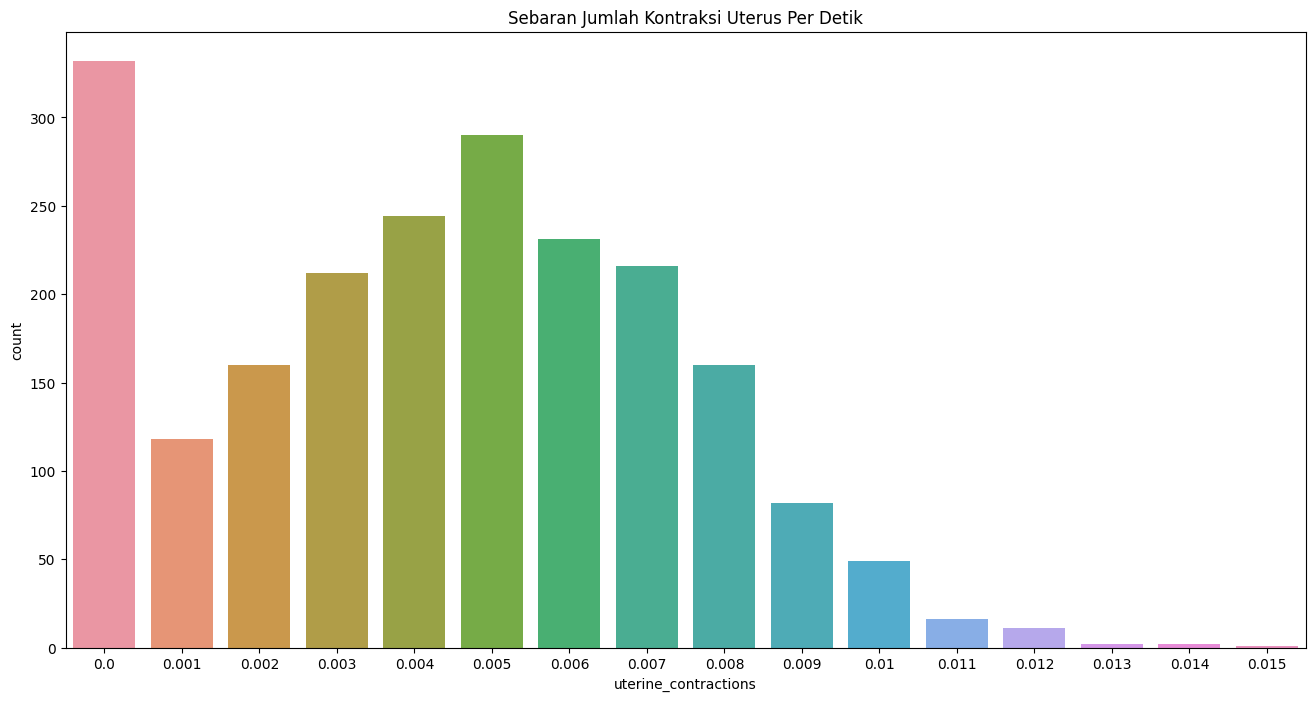

In [10]:
plt.figure(figsize=(16,8))
plt.title('Sebaran Jumlah Kontraksi Uterus Per Detik')
sns.countplot(x=df['uterine_contractions'],hue_order=df.uterine_contractions.value_counts().index[:10])
plt.show()

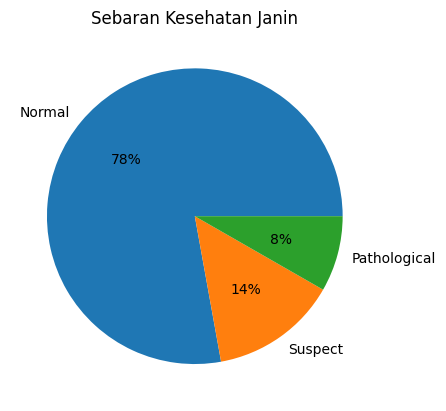

In [11]:
# Count the number of instances in each class
class_counts = df['fetal_health'].value_counts()

# Create a list of labels
labels = ["Normal", "Suspect", "Pathological"]

# Create a list of values
values = class_counts.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.0f%%")

# Add a title
plt.title("Sebaran Kesehatan Janin")

# Show the plot
plt.show()

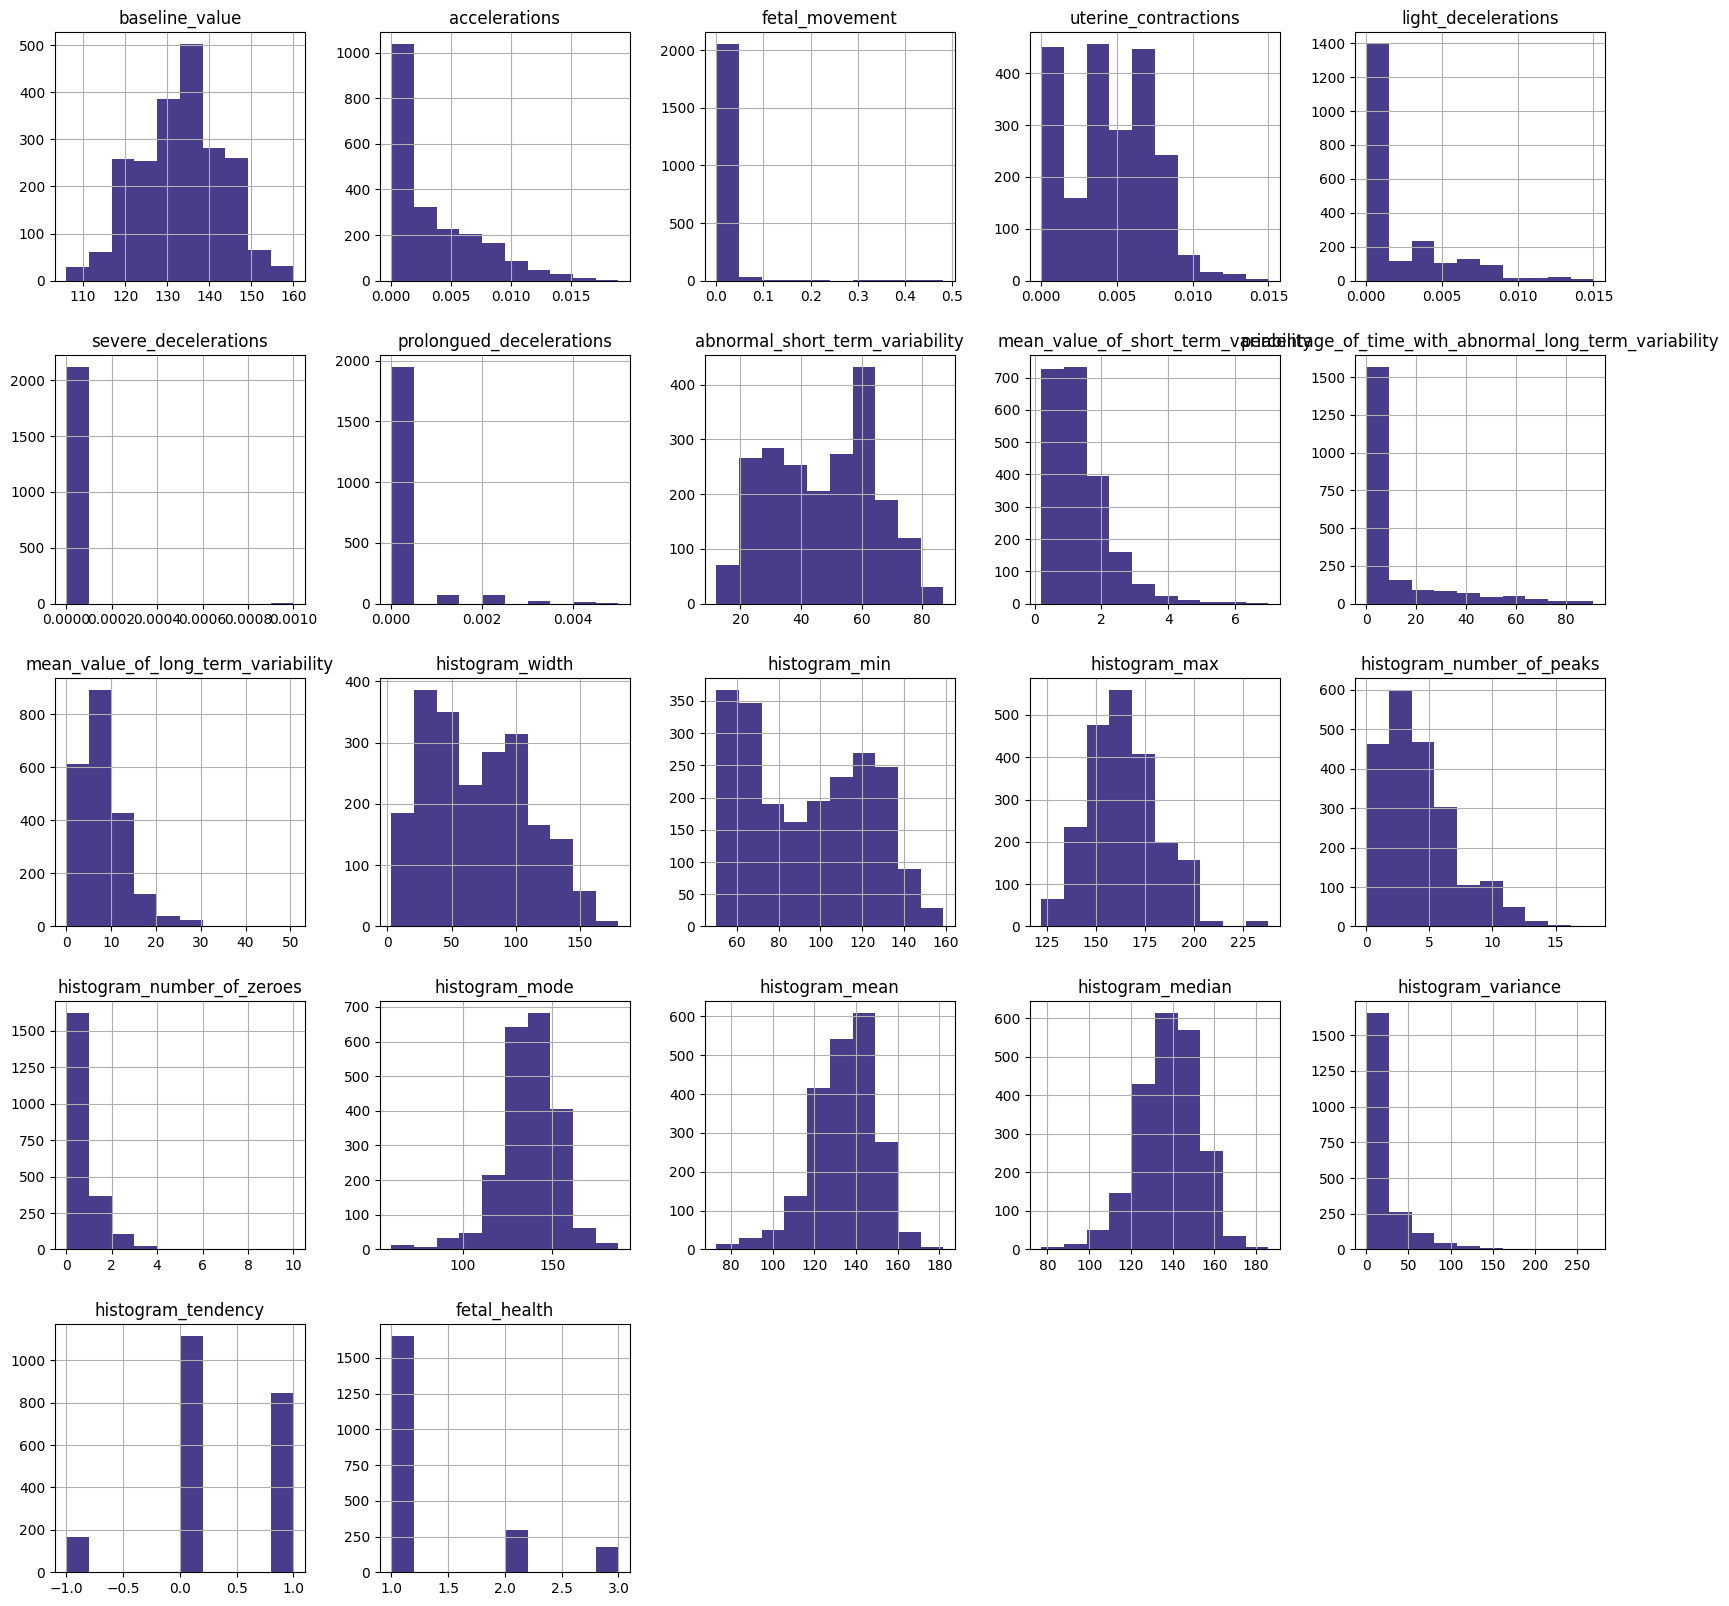

In [12]:
hist_plot = df.hist(figsize = (20,20), color = "#483D8B")

# Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability       

In [14]:
kol = ["histogram_width", "histogram_min", "histogram_max", "histogram_number_of_peaks",
    "histogram_number_of_zeroes", "histogram_mode", "histogram_mean", "histogram_median", "fetal_health"]

In [15]:
df[kol] = df[kol].astype(int)

In [16]:
df = df[kol]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   histogram_width             2126 non-null   int32
 1   histogram_min               2126 non-null   int32
 2   histogram_max               2126 non-null   int32
 3   histogram_number_of_peaks   2126 non-null   int32
 4   histogram_number_of_zeroes  2126 non-null   int32
 5   histogram_mode              2126 non-null   int32
 6   histogram_mean              2126 non-null   int32
 7   histogram_median            2126 non-null   int32
 8   fetal_health                2126 non-null   int32
dtypes: int32(9)
memory usage: 155.9+ KB


In [18]:
df.head(10)

,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,fetal_health
0,64,62,126,2,0,120,137,121,2
1,130,68,198,6,1,141,136,140,1
2,130,68,198,5,1,141,135,138,1
3,117,53,170,11,0,137,134,137,1
4,117,53,170,9,0,137,136,138,1
5,150,50,200,5,3,76,107,107,3
6,150,50,200,6,3,71,107,106,3
7,68,62,130,0,0,122,122,123,3
8,68,62,130,0,0,122,122,123,3
9,68,62,130,1,0,122,122,123,3


# modeling

In [19]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [21]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [22]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.66397849462365 % and k = [1]


In [23]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.63949843260188 % and k = [1]


In [24]:
knn = KNeighborsClassifier(3)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8432601880877743

In [25]:
input_data = (150, 50, 200, 5, 3, 76, 107, 107)

input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print('kondisi janin dalam keadaan normal')
elif (prediction == 2):
    print('kondisi janin dalam keadaan mencurigakan')
else:
    print('kondisi janin dalam keadaan tidak normal')

[3]
kondisi janin dalam keadaan tidak normal


# Visualisasi hasil algoritma

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92       501
           2       0.52      0.42      0.47        85
           3       0.77      0.58      0.66        52

    accuracy                           0.84       638
   macro avg       0.73      0.65      0.68       638
weighted avg       0.83      0.84      0.84       638



Text(0.5, 23.52222222222222, 'Predicted label')

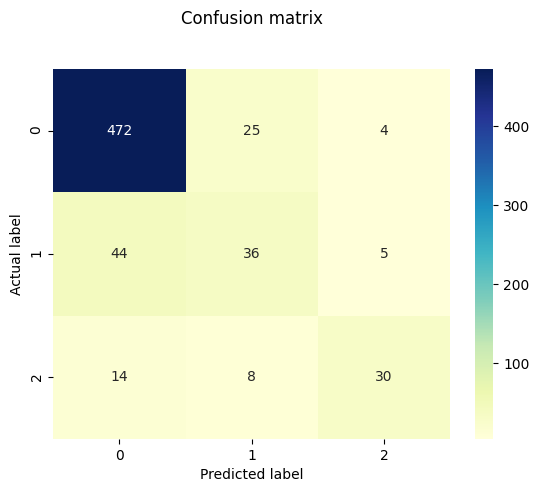

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<Axes: >

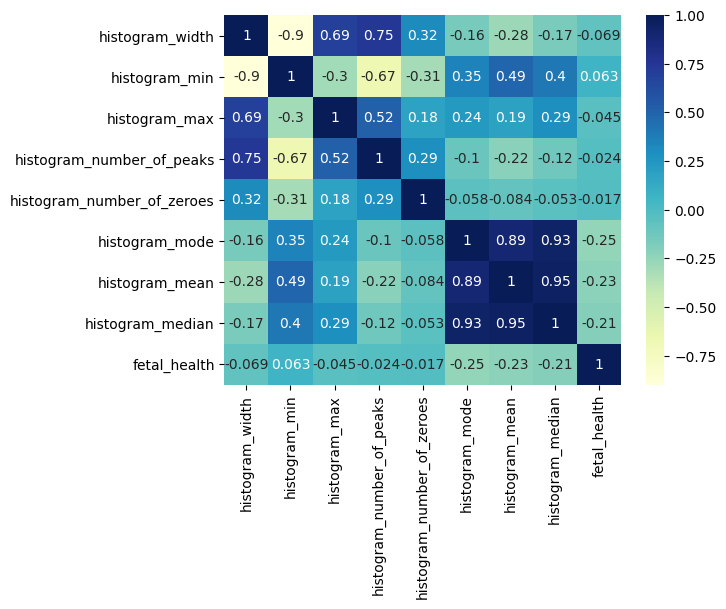

In [29]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [30]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error Rate with respect to K-Value')

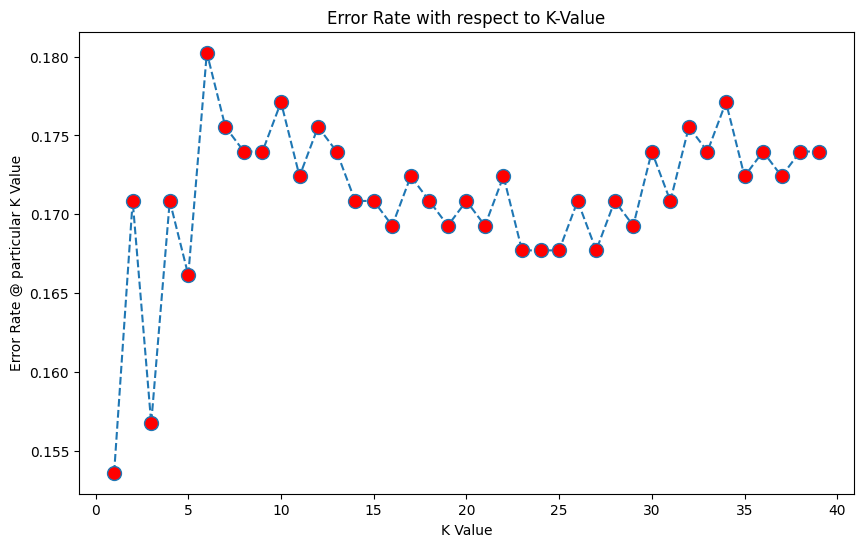

In [31]:
# Plot out the figure
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, linestyle = "--", marker = "o", markerfacecolor = "red", markersize = 10)
plt.xlabel("K Value")
plt.ylabel("Error Rate @ particular K Value")
plt.title("Error Rate with respect to K-Value")

# save model (pickle)

In [32]:
filename = 'janin.sav'
pickle.dump(knn,open(filename,'wb'))